In [1]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)
pic_ind = 0

# Лабораторная работа $№3$ 

# «Сопряженные направления»
<font size="4">**Вариант $№6$**</font>

Найти с заданной точностью точку минимума и минимальное значение целевой функции методами:
    
•	сопряженных градиентов;

•	Флетчера-Ривса;

•	Полака-Рибьера.

Начинать всегда с квадратичной функции (аналитически для нее найти точное решение, с котором сравнивать полученное численное). Далее исследовать функцию Розенброка  $f(x,y)= \alpha (x^2 - y)^2 + (x-1)^2$ различными параметрами $\alpha$. При исследовании для каждой функции брать два параметра точности поиска $\varepsilon = 0.01$ и $\varepsilon = 0.00001$. 
 
   Также для каждой функции и каждого параметра точности поиска взять две различные (существенно различные) начальные точки. Начальные точки выбрать самостоятельно. В методах, в которых необходимо проводить одномерную минимизацию (например в наискорейшем спуске), использовать свой метод золотого сечения, реализованный в лабораторной работе №1.

   В результате исследований должно быть выявлено влияние на стоимость методов (количество вычисленных значений целевой функции)
    
   • параметров точности поиска;
    
   • начальной точки;
    
   • выпуклости (переход от квадратичной функции к функции Розенброка);
    
   • овражности функции (параметра  в функции Розенброка).

# Постановка задачи
1) $f_1(x, y) = 5x^2 + 4xy + 2y^2 + 4\sqrt5 (x+y) + 51$;

   $f_1(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.
 
$\phantom{x}$ 
2) $f_2(x, y) = \alpha (x^2 - y)^2 + (x-1)^2$, $\phantom{x}\alpha \in \{1, 20\}$;

   $\phantom{xxi}$ $f_2(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.


Опишем целевые функции:

In [2]:
import numpy as np

def f1_pl(x, y):
    return 5*x*x + 4*x*y + 2*y*y + 4*np.sqrt(5)*(x+y) + 51
def f21_pl(x, y):
    return (x*x - y)**2 + (x-1)**2
def f22_pl(x, y):
    return 20*(x*x - y)**2 + (x-1)**2

In [3]:
eps1 = 0.01
eps2 = 10**(-5)

Представим целевую функцию графически:

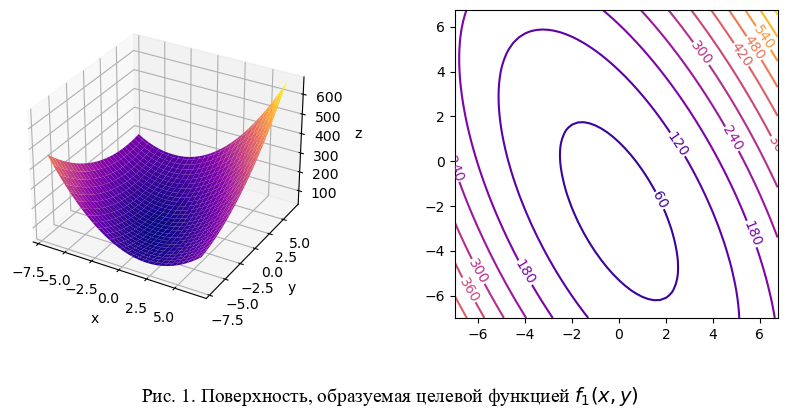

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
F1 = np.vectorize(f1_pl)
Z = F1(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 1. Поверхность, образуемая целевой функцией $f_1(x,y)$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
plt.show()

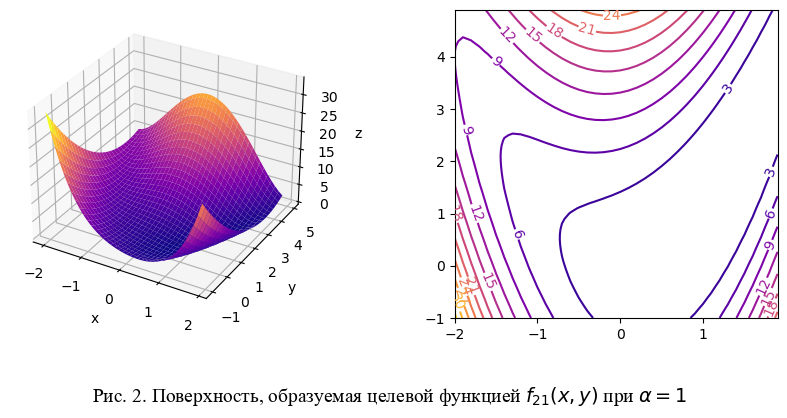

In [5]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F2 = np.vectorize(f21_pl)
Z = F2(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 2. Поверхность, образуемая целевой функцией $f_{21}(x,y)$ при $α = 1$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
 
plt.show()

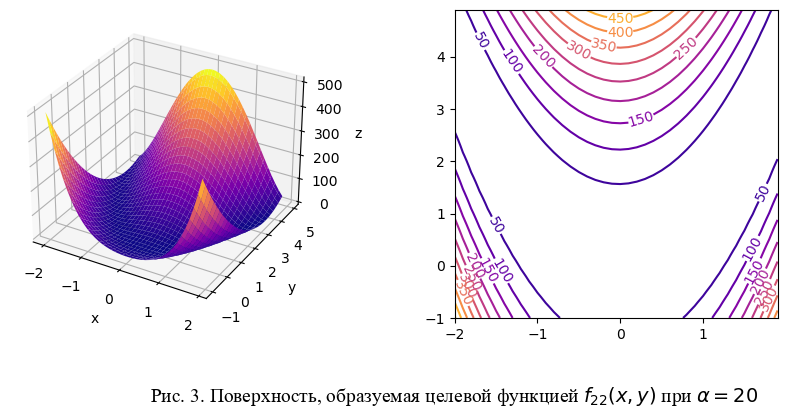

In [6]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F22 = np.vectorize(f22_pl)
Z = F22(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=10, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 3. Поверхность, образуемая целевой функцией $f_{22}(x,y)$ при $α = 20$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = 0)
 
plt.show()

# Реализация метода сопряжённых градиентов

Вспомогательные функции:

In [7]:
def f1(x):
    return 5*x[0]*x[0] + 4*x[0]*x[1] + 2*x[1]*x[1] + 4*np.sqrt(5)*(x[0]+x[1]) + 51
def f21(x):
    return (x[0]*x[0] - x[1])**2 + (x[0]-1)**2
def f22(x):
    return 20*(x[0]*x[0] - x[1])**2 + (x[0]-1)**2

def grad_f1(x):
    return np.array([grad_xf1(x), grad_yf1(x)])

def grad_xf1(x):
    return 10*x[0]+4*x[1]+4*np.sqrt(5)
def grad_yf1(x):
    return 4*x[0]+4*x[1]+4*np.sqrt(5)

def grad_f21(x):
    return np.array([grad_xf21(x), grad_yf21(x)])

def grad_xf21(x):
    return 2*(-1 + x[0]) + 4*x[0]*(x[0]*x[0] - x[1])
def grad_yf21(x):
    return -2*(x[0]*x[0] - x[1])

def grad_f22(x):
    return np.array([grad_xf22(x), grad_yf22(x)])

def grad_xf22(x):
    return 2*(-1 + x[0]) + 80*x[0]*(x[0]*x[0] - x[1])
def grad_yf22(x):
    return -40*(x[0]*x[0] - x[1])

def deriv_x(func, x, y, eps):
    h = eps*1e-1
    return (func(x+h, y)-func(x-h, y))/(2*h)
def deriv_y(func, x, y, eps):
    h = eps*1e-1
    return (func(x, y+h)-func(x, y-h))/(2*h)

def GoldenRatioMinSearch(func, a, b, eps):
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    while length >= eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
        length = b - a
    return (a+b)/2


In [8]:
def ConjugateMinSearch(func, gradf, eps, x0):
    x = x0
    w = -gradf(x)
    p = w
    k = 1
    length = np.linalg.norm(w)
    if length < eps: return x, y, func(x, y), iterations
    while True:
        psi = lambda hi: func(x + hi*p)
        hi = GoldenRatioMinSearch(psi, 0, 1, eps*1e-2)
        #x_prev = x
        x = x + hi*p
        #if np.linalg.norm(x-x_prev) < eps: break
        scal_wp = np.matmul(w,p)
        w = -gradf(x)
        length = np.linalg.norm(w)
        if length < eps: break
        if k % 2 == 0:
            p = w
            k += 1
            continue
        gamma = np.matmul(w,w) / scal_wp
        p = gamma*p + w
        k += 1
    return x, func(x), k


In [9]:
ConjugateMinSearch(f1, grad_f1, eps1, np.array([2, -5]))

(array([ 4.85624390e-06, -2.23608752e+00]), 41.000000000501835, 2)

In [10]:
ConjugateMinSearch(f1, grad_f1, eps2, np.array([2, -5]))

(array([ 2.47460961e-08, -2.23606804e+00]), 41.00000000000001, 2)

# Реализация метода Флетчера—Ривса

In [11]:
def FletcherReevesMinSearch(func, gradf, eps, x0):
    x = x0
    w = -gradf(x)
    p = w
    length = np.linalg.norm(w)
    k = 1
    if length < eps: return x, func(x), k
    while True:
        psi = lambda hi: func(x + hi*p)
        hi = GoldenRatioMinSearch(psi, 0, 2, eps*1e-2)
        x = x + hi*p
        prev_w = w
        w = -gradf(x)
        #prev_length = length
        length = np.linalg.norm(w)
        if length < eps: break
        if k % 3 == 0:
            p = w
            k +=1
            continue
        gamma = np.matmul(w,w) / np.matmul(prev_w,prev_w)
        p = gamma*p + w
        k += 1
    return x, func(x), k

In [12]:
FletcherReevesMinSearch(f1, grad_f1, eps1, np.array([2, -5]))

(array([-3.00813118e-05, -2.23599299e+00]), 41.00000000674835, 2)

In [13]:
FletcherReevesMinSearch(f1, grad_f1, eps2, np.array([2, -5]))

(array([-2.97442325e-08, -2.23606789e+00]), 41.00000000000001, 2)

In [14]:
FletcherReevesMinSearch(f1, grad_f1, eps1, np.array([-1, 12]))

(array([-4.02736602e-04, -2.23528187e+00]), 41.00000078054206, 3)

In [15]:
FletcherReevesMinSearch(f1, grad_f1, eps1, np.array([-4, 2.5]))

(array([ 1.09420437e-04, -2.23584620e+00]), 41.000000255299646, 2)

# Реализация метода Полака—Рибьера

In [16]:
def PolakRibiereMinSearch(func, gradf, eps, x0):
    x = x0
    w = -gradf(x)
    p = w
    length = np.linalg.norm(w)
    k = 1
    if length < eps: return x, func(x), k
    while True:
        psi = lambda hi: func(x + hi*p)
        hi = GoldenRatioMinSearch(psi, 0, 2, eps)
        x = x + hi*p
        prev_w = w
        w = -gradf(x)
        length = np.linalg.norm(w)
        if length < eps: break
        if k % 3 == 0:
            p = w
            k += 1
            continue
        scal_www = np.matmul(w - prev_w, w)
        k += 1
        gamma = scal_www / np.matmul(prev_w, prev_w)
        p = gamma*p + w
    return x, func(x), k

In [17]:
PolakRibiereMinSearch(f1, grad_f1, eps1, np.array([2, -5]))

(array([-8.00232892e-06, -2.23612381e+00]), 41.00000000834186, 5)

In [18]:
PolakRibiereMinSearch(f1, grad_f1, eps2, np.array([2, -5]))

(array([-6.05599859e-07, -2.23606606e+00]), 41.00000000000455, 3)

# Анализ методов

In [19]:
def InfoGoldenRatioMinSearch(func, a, b, eps):
    fcalls = 0
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    fcalls += 2
    while length > eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
            fcalls += 1
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
            fcalls += 1
        length = b - a
    res = (a+b)/2
    return res, fcalls
###
#     x = x0
#     w = -gradf(x)
#     p = w
#     k = 1
#     length = np.linalg.norm(w)
#     if length < eps: return x, y, func(x, y), iterations
#     while True:
#         psi = lambda hi: func(x + hi*p)
#         hi = GoldenRatioMinSearch(psi, 0, 1.9, eps*1e-2)
#         x = x + hi*p
#         scal_wp = np.matmul(w,p)
#         w = -gradf(x)
#         length = np.linalg.norm(w)
#         if length < eps: break
#         if k % 2 == 0:
#             p = w
#             k += 1
#             continue
#         gamma = np.matmul(w,w) / scal_wp
#         p = gamma*p + w
#         k += 1
#     return x, func(x), k

###
def InfoConjugateMinSearch(func, gradf, eps, x0, quad=False):
    x = x0
    eps0 = eps
    if quad: eps0 = eps*1e-2 
    xvals = [x[0]]
    yvals = [x[1]]
    w = -gradf(x)
    gradcalls = 1
    fcalls = 0
    p = w
    k = 1
    length = np.linalg.norm(w)
    if length < eps: return x[0], x[1], func(x), xvals, yvals, k, fcalls, gradcalls
    while True:
        psi = lambda hi: func(x + hi*p)
        hi, temp_fcalls = InfoGoldenRatioMinSearch(psi, 0, 1, eps0)
        fcalls += temp_fcalls
        #x_prev = x
        x = x + hi*p
        #if np.linalg.norm(x-x_prev) <= eps: break
        xvals.append(x[0])
        yvals.append(x[1])
        scal_wp = np.matmul(w,p)
        w = -gradf(x)
        gradcalls += 1
        length = np.linalg.norm(w)
        if length < eps: break
        if k % 2 == 0:
            p = w
            k += 1
            continue
        gamma = np.matmul(w,w) / scal_wp
        p = gamma*p + w
        k += 1
    return x[0], x[1], func(x), xvals, yvals, k, fcalls, gradcalls

###
#     x = x0
#     w = -gradf(x)
#     p = w
#     length = np.linalg.norm(w)
#     k = 1
#     if length < eps: return x, func(x), k
#     while True:
#         psi = lambda hi: func(x + hi*p)
#         hi = GoldenRatioMinSearch(psi, 0, 2, eps*1e-3)
#         x = x + hi*p
#         prev_w = w
#         w = -gradf(x)
#         #prev_length = length
#         length = np.linalg.norm(w)
#         if length < eps: break
#         if k % 2 == 0:
#             p = w
#             k +=1
#             continue
#         gamma = np.matmul(w,w) / np.matmul(prev_w,prev_w)
#         p = gamma*p + w
#         k += 1
###
def InfoFletcherReevesMinSearch(func, gradf, eps, x0, quad=False):
    x = x0
    xvals = [x[0]]
    yvals = [x[1]]
    eps0 = eps
    if quad: eps0 *= 1e-2
    w = -gradf(x)
    gradcalls = 1
    fcalls = 0
    p = w
    k = 1
    length = np.linalg.norm(w)
    if length < eps: return x[0], x[1], func(x), xvals, yvals, k, fcalls, gradcalls
    while True:
        psi = lambda hi: func(x + hi*p)
        hi, temp_fcalls = InfoGoldenRatioMinSearch(psi, 0, 1, eps0)
        fcalls += temp_fcalls
        #x_prev = x
        x = x + hi*p
        #if np.linalg.norm(x-x_prev) <= eps: break
        xvals.append(x[0])
        yvals.append(x[1])
        prev_w = w
        w = -gradf(x)
        gradcalls += 1
        length = np.linalg.norm(w)
        if length < eps: break
        if k % 2 == 0:
            p = w
            k += 1
            continue
        gamma = np.matmul(w,w) / np.matmul(prev_w,prev_w)
        p = gamma*p + w
        k += 1
    return x[0], x[1], func(x), xvals, yvals, k, fcalls, gradcalls

###
#     x = x0
#     w = -gradf(x)
#     p = w
#     length = np.linalg.norm(w)
#     k = 1
#     if length < eps: return x, func(x), k
#     while True:
#         psi = lambda hi: func(x + hi*p)
#         hi = GoldenRatioMinSearch(psi, 0, 2, eps*1e-2)
#         x = x + hi*p
#         prev_w = w
#         w = -gradf(x)
#         length = np.linalg.norm(w)
#         if length < eps: break
#         if k % 2 == 0:
#             p = w
#             k += 1
#             continue
#         scal_www = np.matmul(w - prev_w, w)
#         k += 1
#         gamma = scal_www / np.matmul(prev_w, prev_w)
#         p = gamma*p + w
###
def InfoPolakRibiereMinSearch(func, gradf, eps, x0, quad=False):
    x = x0
    xvals = [x[0]]
    yvals = [x[1]]
    eps0 = eps
    if quad: eps0 *= 1e-2
    w = -gradf(x)
    gradcalls = 1
    fcalls = 0
    p = w
    k = 1
    length = np.linalg.norm(w)
    if length < eps: return x[0], x[1], func(x), xvals, yvals, k, fcalls, gradcalls
    while True:
        psi = lambda hi: func(x + hi*p)
        hi, temp_fcalls = InfoGoldenRatioMinSearch(psi, 0, 1, eps0)
        fcalls += temp_fcalls
        #x_prev = x
        x = x + hi*p
        #if np.linalg.norm(x-x_prev) <= eps: break
        xvals.append(x[0])
        yvals.append(x[1])
        prev_w = w
        w = -gradf(x)
        gradcalls += 1
        length = np.linalg.norm(w)
        if length < eps: break
        if k % 2 == 0:
            p = w
            k += 1
            continue
        scal_www = np.matmul(w - prev_w, w)
        gamma = scal_www / np.matmul(prev_w, prev_w)
        p = gamma*p + w
        k += 1
    return x[0], x[1], func(x), xvals, yvals, k, fcalls, gradcalls


In [20]:
def ExperimentPlot(func, xmin, xmax, ymin, ymax, n1, n2,n3,
                   xs1, ys1, xs2, ys2, xs3, ys3, 
                    ind, xstart, ystart,
                    xspacing, yspacing, fnum = 1, eps = 2):
    x = np.linspace(xmin, xmax)
    y = np.linspace(ymin, ymax)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(9, 5))
    levels1 = []
    levels2 = []
    levels3 = []
    ax[0].scatter(xs1[0:n1], ys1[0:n1], color='red', lw=0.05, zorder=2)
    ax[0].scatter(xs1[-1], ys1[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[1].scatter(xs2[0:n2], ys2[0:n2], color='red', lw=0.05, zorder=2)
    ax[1].scatter(xs2[-1], ys2[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[2].scatter(xs3[0:n3], ys3[0:n3], color='red', lw=0.05, zorder=2)
    ax[2].scatter(xs3[-1], ys3[-1], color='red', lw=0.05, marker='*', zorder=2)
    
    for i in range(0, n1):
        levels1.append(func(xs1[i], ys1[i]))
        ax[0].annotate('', xytext=(xs1[i], ys1[i]), xy=(xs1[i+1], ys1[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels1.sort()
    CS1 = ax[0].contour(X, Y, Z, cmap=cm.plasma, levels=levels1, zorder=1)
    ax[0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 1)
    
    for i in range(0,n2):
        levels2.append(func(xs2[i], ys2[i]))
        ax[1].annotate('', xytext=(xs2[i], ys2[i]), xy=(xs2[i+1], ys2[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels2.sort()
    CS2 = ax[1].contour(X, Y, Z, cmap=cm.plasma, levels=levels2, zorder=1)
    ax[1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)
    
    for i in range(0,n3):
        levels3.append(func(xs3[i], ys3[i]))
        ax[2].annotate('', xytext=(xs3[i], ys3[i]), xy=(xs3[i+1], ys3[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels3.sort()
    CS3 = ax[2].contour(X, Y, Z, cmap=cm.plasma, levels=levels3, zorder=1)
    ax[2].clabel(CS3, CS3.levels,inline=True,inline_spacing = 1)

    ax[0].annotate('$p_{min}$', xytext=(xs1[-1]+xspacing, ys1[-1]-yspacing), xy=(xs1[-1], ys1[-1]))
    ax[0].annotate('$p_{start}$', xytext=(xs1[0]+xspacing, ys1[0]-yspacing), xy=(xs1[0], ys1[0]))
    ax[0].set_xlabel('x \n \n a)')
    
    ax[1].annotate('$p_{min}$', xytext=(xs2[-1]+xspacing, ys2[-1]-yspacing), xy=(xs2[-1], ys2[-1]))
    ax[1].annotate('$p_{start}$', xytext=(xs2[0]+xspacing, ys2[0]-yspacing), xy=(xs2[0], ys2[0]))
    ax[1].set_xlabel('x \n \n б)')
    
    ax[2].annotate('$p_{min}$', xytext=(xs3[-1]+xspacing, ys3[-1]-yspacing), xy=(xs3[-1], ys3[-1]))
    ax[2].annotate('$p_{start}$', xytext=(xs3[0]+xspacing, ys3[0]-yspacing), xy=(xs3[0], ys3[0]))
    ax[2].set_xlabel('x \n \n в)')
    
    ax[0].set_ylabel('y')
    ax[1].set_ylabel('y')
    ax[2].set_ylabel('y')
    plt.title(f'Рис. {ind}.'+' Траектория поиска точки минимума функции $f_{'+f'{fnum}'+'}(x, y)$ методом сопряжённых направлений (а), \n \
    Флетчера-Ривса (б), Полака-Рибьера (в), $ε=10^{'+f'{-eps}'+'}$, $p_{start}=($'+f'{xstart}, {ystart}'+'$)$',
                 fontsize=14, fontname='Times New Roman',y=-0.56, x = -0.9)
    plt.tight_layout()
    plt.subplots_adjust( wspace=0.3,bottom=0.3)
    plt.show()
    

In [21]:
xmins1 = []
xmins2 = []
xmins3 = []
ymins1 = []
ymins2 = []
ymins3 = []
fmins1 = []
fmins2 = []
fmins3 = []
its1 = []
its2 = []
its3 = []
fls1 = []
fls2 = []
fls3 = []
grs1 = []
grs2 = []
grs3 = []

In [22]:
xmin0_f1, ymin0_f1, fmin0_f1, xs0_f1, ys0_f1, its0_f1, fls0_f1, grs0_f1 = InfoConjugateMinSearch(f1, grad_f1, eps1, 
                                                                                                 np.array([-4, 2.5]), True)
xmins1.append(xmin0_f1)
ymins1.append(ymin0_f1)
fmins1.append(fmin0_f1)
its1.append(its0_f1)
fls1.append(fls0_f1)
grs1.append(grs0_f1)

In [23]:
xmin1_f1, ymin1_f1, fmin1_f1, xs1_f1, ys1_f1, its1_f1, fls1_f1, grs1_f1 = InfoFletcherReevesMinSearch(f1, grad_f1, eps1, 
                                                                                                 np.array([-4, 2.5]), True)
xmins2.append(xmin1_f1)
ymins2.append(ymin1_f1)
fmins2.append(fmin1_f1)
its2.append(its1_f1)
fls2.append(fls1_f1)
grs2.append(grs1_f1)

In [24]:
xmin2_f1, ymin2_f1, fmin2_f1, xs2_f1, ys2_f1, its2_f1, fls2_f1, grs2_f1 = InfoPolakRibiereMinSearch(f1, grad_f1, eps1, 
                                                                                                 np.array([-4, 2.5]), True)
xmins3.append(xmin2_f1)
ymins3.append(ymin2_f1)
fmins3.append(fmin2_f1)
its3.append(its2_f1)
fls3.append(fls2_f1)
grs3.append(grs2_f1)

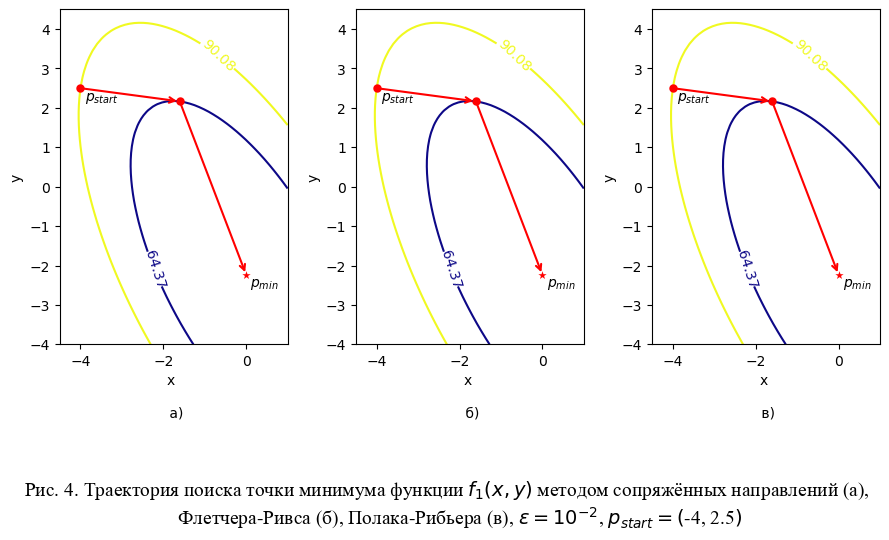

In [25]:
ExperimentPlot(np.vectorize(f1_pl), xmin=-4.5, xmax=1, 
               ymin=-4, ymax=4.5, n1=its1[-1], n2=its2[-1], n3=its3[-1],
               xs1=xs0_f1, ys1=ys0_f1,
               xs2=xs1_f1, ys2=ys1_f1, 
               xs3=xs2_f1, ys3=ys2_f1,
               ind=4, xstart=-4, ystart=2.5,
              xspacing=0.1, yspacing=0.3, fnum=1)

In [26]:
xmin3_f1, ymin3_f1, fmin3_f1, xs3_f1, ys3_f1, its3_f1, fls3_f1, grs3_f1 = InfoConjugateMinSearch(f1, grad_f1, eps2, 
                                                                                                 np.array([-4, 2.5]), True)
xmins1.append(xmin3_f1)
ymins1.append(ymin3_f1)
fmins1.append(fmin3_f1)
its1.append(its3_f1)
fls1.append(fls3_f1)
grs1.append(grs3_f1)

In [27]:
xmin4_f1, ymin4_f1, fmin4_f1, xs4_f1, ys4_f1, its4_f1, fls4_f1, grs4_f1 = InfoFletcherReevesMinSearch(f1, grad_f1, eps2, 
                                                                                                 np.array([-4, 2.5]), True)
xmins2.append(xmin4_f1)
ymins2.append(ymin4_f1)
fmins2.append(fmin4_f1)
its2.append(its4_f1)
fls2.append(fls4_f1)
grs2.append(grs4_f1)

In [28]:
xmin5_f1, ymin5_f1, fmin5_f1, xs5_f1, ys5_f1, its5_f1, fls5_f1, grs5_f1 = InfoPolakRibiereMinSearch(f1, grad_f1, eps2, 
                                                                                                 np.array([-4, 2.5]), True)
xmins3.append(xmin5_f1)
ymins3.append(ymin5_f1)
fmins3.append(fmin5_f1)
its3.append(its5_f1)
fls3.append(fls5_f1)
grs3.append(grs5_f1)

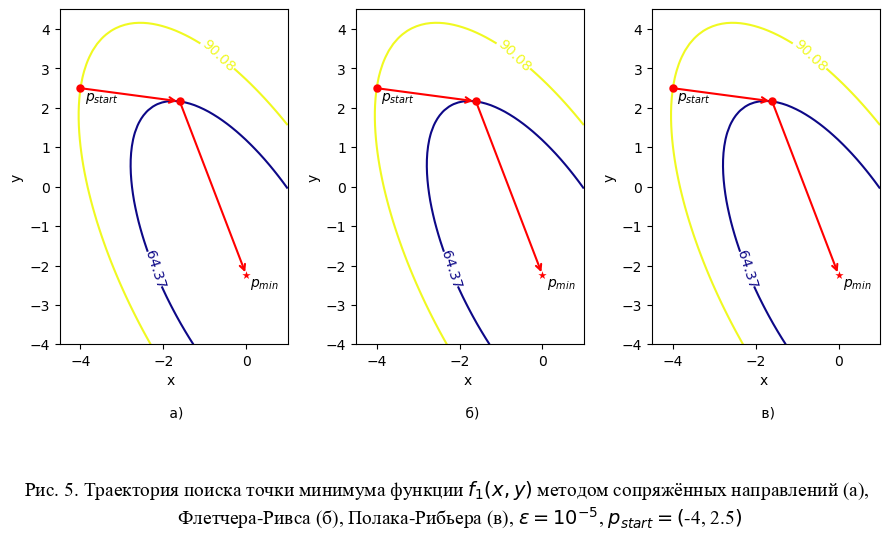

In [29]:
ExperimentPlot(np.vectorize(f1_pl), xmin=-4.5, xmax=1, 
               ymin=-4, ymax=4.5, n1=its1[-1], n2=its2[-1], n3=its3[-1],
               xs1=xs3_f1, ys1=ys3_f1,
               xs2=xs4_f1, ys2=ys4_f1, 
               xs3=xs5_f1, ys3=ys5_f1,
               ind=5, xstart=-4, ystart=2.5,
              xspacing=0.1, yspacing=0.3, fnum=1, eps=5)

In [30]:
xmin6_f1, ymin6_f1, fmin6_f1, xs6_f1, ys6_f1, its6_f1, fls6_f1, grs6_f1 = InfoConjugateMinSearch(f1, grad_f1, eps1, 
                                                                                                 np.array([2, -5]), True)
xmins1.append(xmin6_f1)
ymins1.append(ymin6_f1)
fmins1.append(fmin6_f1)
its1.append(its6_f1)
fls1.append(fls6_f1)
grs1.append(grs6_f1)

In [31]:
xmin7_f1, ymin7_f1, fmin7_f1, xs7_f1, ys7_f1, its7_f1, fls7_f1, grs7_f1 = InfoFletcherReevesMinSearch(f1, grad_f1, eps1, 
                                                                                                 np.array([2, -5]), True)
xmins2.append(xmin7_f1)
ymins2.append(ymin7_f1)
fmins2.append(fmin7_f1)
its2.append(its7_f1)
fls2.append(fls7_f1)
grs2.append(grs7_f1)

In [32]:
xmin8_f1, ymin8_f1, fmin8_f1, xs8_f1, ys8_f1, its8_f1, fls8_f1, grs8_f1 = InfoPolakRibiereMinSearch(f1, grad_f1, eps1, 
                                                                                                 np.array([2, -5]), True)
xmins3.append(xmin8_f1)
ymins3.append(ymin8_f1)
fmins3.append(fmin8_f1)
its3.append(its8_f1)
fls3.append(fls8_f1)
grs3.append(grs8_f1)

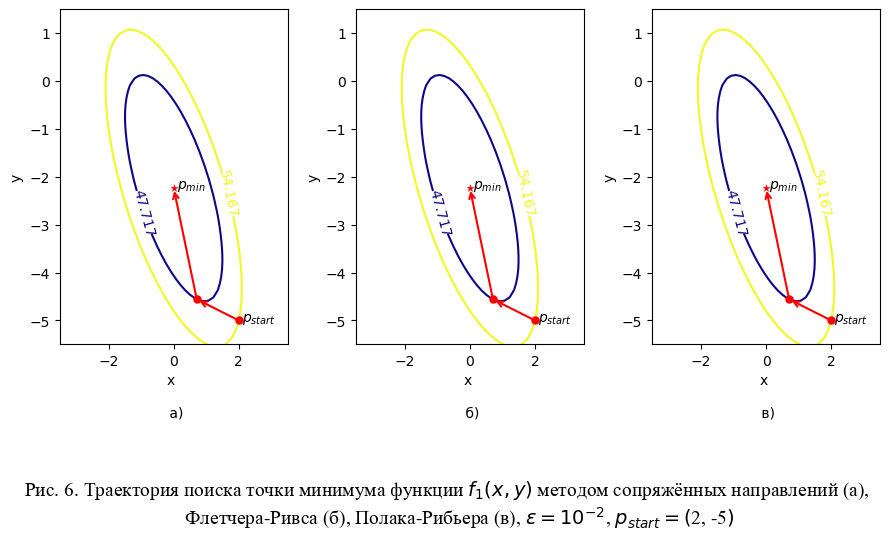

In [33]:
ExperimentPlot(np.vectorize(f1_pl), xmin=-3.5, xmax=3.5, 
               ymin=-5.5, ymax=1.5, n1=its1[-1], n2=its2[-1], n3=its3[-1],
               xs1=xs6_f1, ys1=ys6_f1,
               xs2=xs7_f1, ys2=ys7_f1, 
               xs3=xs8_f1, ys3=ys8_f1,
               ind=6, xstart=2, ystart=-5,
              xspacing=0.1, yspacing=0.01, fnum=1, eps=2)

In [34]:
xmin9_f1, ymin9_f1, fmin9_f1, xs9_f1, ys9_f1, its9_f1, fls9_f1, grs9_f1 = InfoConjugateMinSearch(f1, grad_f1, eps2, 
                                                                                                 np.array([2, -5]), True)
xmins1.append(xmin9_f1)
ymins1.append(ymin9_f1)
fmins1.append(fmin9_f1)
its1.append(its9_f1)
fls1.append(fls9_f1)
grs1.append(grs9_f1)

In [35]:
xmin10_f1, ymin10_f1, fmin10_f1, xs10_f1, ys10_f1, its10_f1, fls10_f1, grs10_f1 = InfoFletcherReevesMinSearch(f1, grad_f1, eps2, 
                                                                                                 np.array([2, -5]), True)
xmins2.append(xmin10_f1)
ymins2.append(ymin10_f1)
fmins2.append(fmin10_f1)
its2.append(its10_f1)
fls2.append(fls10_f1)
grs2.append(grs10_f1)

In [36]:
xmin11_f1, ymin11_f1, fmin11_f1, xs11_f1, ys11_f1, its11_f1, fls11_f1, grs11_f1 = InfoPolakRibiereMinSearch(f1, grad_f1, eps2, 
                                                                                                 np.array([2, -5]), True)
xmins3.append(xmin11_f1)
ymins3.append(ymin11_f1)
fmins3.append(fmin11_f1)
its3.append(its11_f1)
fls3.append(fls11_f1)
grs3.append(grs11_f1)

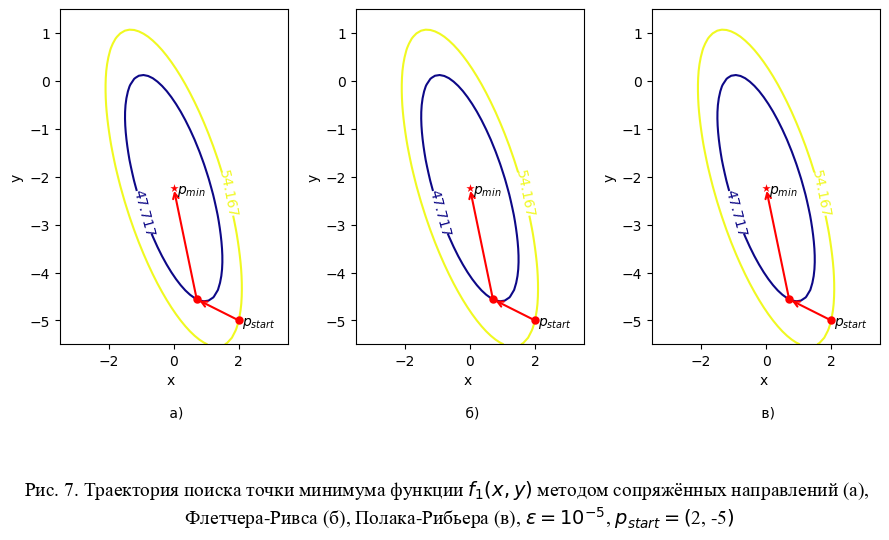

In [37]:
ExperimentPlot(np.vectorize(f1_pl),  xmin=-3.5, xmax=3.5, 
               ymin=-5.5, ymax=1.5, n1=its1[-1], n2=its2[-1], n3=its3[-1],
               xs1=xs9_f1, ys1=ys9_f1,
               xs2=xs10_f1, ys2=ys10_f1, 
               xs3=xs11_f1, ys3=ys11_f1,
               ind=7, xstart=2, ystart=-5,
              xspacing=0.1, yspacing=0.1, fnum=1, eps=5)

In [38]:
xmin0_f21, ymin0_f21, fmin0_f21, xs0_f21, ys0_f21, its0_f21, fls0_f21, grs0_f21 = InfoConjugateMinSearch(f21, grad_f21, eps1, 
                                                                                                 np.array([-4, 2.5]))
xmins1.append(xmin0_f21)
ymins1.append(ymin0_f21)
fmins1.append(fmin0_f21)
its1.append(its0_f21)
fls1.append(fls0_f21)
grs1.append(grs0_f21)

In [39]:
xmin1_f21, ymin1_f21, fmin1_f21, xs1_f21, ys1_f21, its1_f21, fls1_f21, grs1_f21 = InfoFletcherReevesMinSearch(f21, grad_f21, eps1, 
                                                                                                 np.array([-4, 2.5]))
xmins2.append(xmin1_f21)
ymins2.append(ymin1_f21)
fmins2.append(fmin1_f21)
its2.append(its1_f21)
fls2.append(fls1_f21)
grs2.append(grs1_f21)

In [40]:
xmin2_f21, ymin2_f21, fmin2_f21, xs2_f21, ys2_f21, its2_f21, fls2_f21, grs2_f21 = InfoPolakRibiereMinSearch(f21, grad_f21, eps1, 
                                                                                                 np.array([-4, 2.5]))
xmins3.append(xmin2_f21)
ymins3.append(ymin2_f21)
fmins3.append(fmin2_f21)
its3.append(its2_f21)
fls3.append(fls2_f21)
grs3.append(grs2_f21)

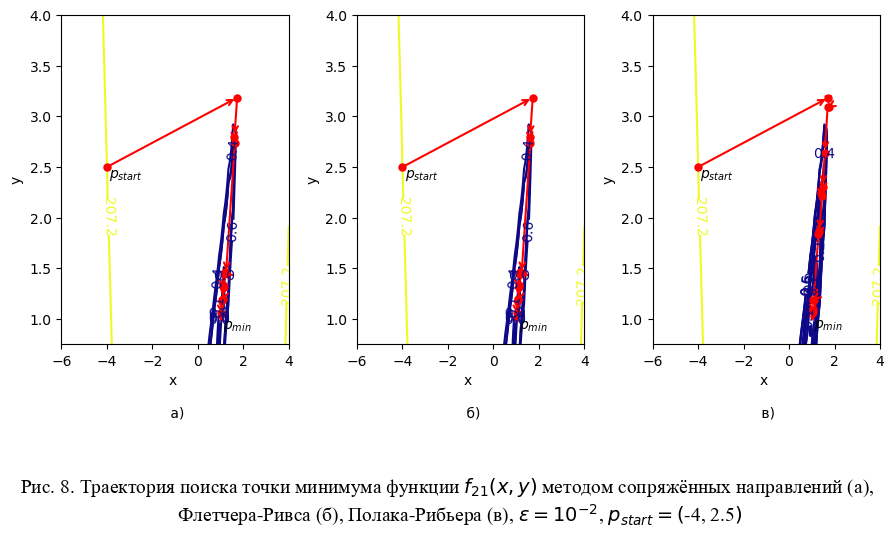

In [41]:
ExperimentPlot(np.vectorize(f21_pl), xmin=-6, xmax=4, 
               ymin=0.75, ymax=4, n1=its1[-1]-1, n2=its2[-1]-1, n3=its3[-1]-1,
               xs1=xs0_f21, ys1=ys0_f21,
               xs2=xs1_f21, ys2=ys1_f21, 
               xs3=xs2_f21, ys3=ys2_f21,
               ind=8, xstart=-4, ystart=2.5,
              xspacing=0.1, yspacing=0.1, fnum=21, eps=2)

In [42]:
xmin3_f21, ymin3_f21, fmin3_f21, xs3_f21, ys3_f21, its3_f21, fls3_f21, grs3_f21 = InfoConjugateMinSearch(f21, grad_f21, eps2, 
                                                                                                 np.array([-4, 2.5]))
xmins1.append(xmin3_f21)
ymins1.append(ymin3_f21)
fmins1.append(fmin3_f21)
its1.append(its3_f21)
fls1.append(fls3_f21)
grs1.append(grs3_f21)

In [43]:
xmin4_f21, ymin4_f21, fmin4_f21, xs4_f21, ys4_f21, its4_f21, fls4_f21, grs4_f21 = InfoFletcherReevesMinSearch(f21, grad_f21, eps2, 
                                                                                                 np.array([-4, 2.5]))
xmins2.append(xmin4_f21)
ymins2.append(ymin4_f21)
fmins2.append(fmin4_f21)
its2.append(its4_f21)
fls2.append(fls4_f21)
grs2.append(grs4_f21)

In [44]:
xmin5_f21, ymin5_f21, fmin5_f21, xs5_f21, ys5_f21, its5_f21, fls5_f21, grs5_f21 = InfoPolakRibiereMinSearch(f21, grad_f21, eps2, 
                                                                                                 np.array([-4, 2.5]))
xmins3.append(xmin5_f21)
ymins3.append(ymin5_f21)
fmins3.append(fmin5_f21)
its3.append(its5_f21)
fls3.append(fls5_f21)
grs3.append(grs5_f21)

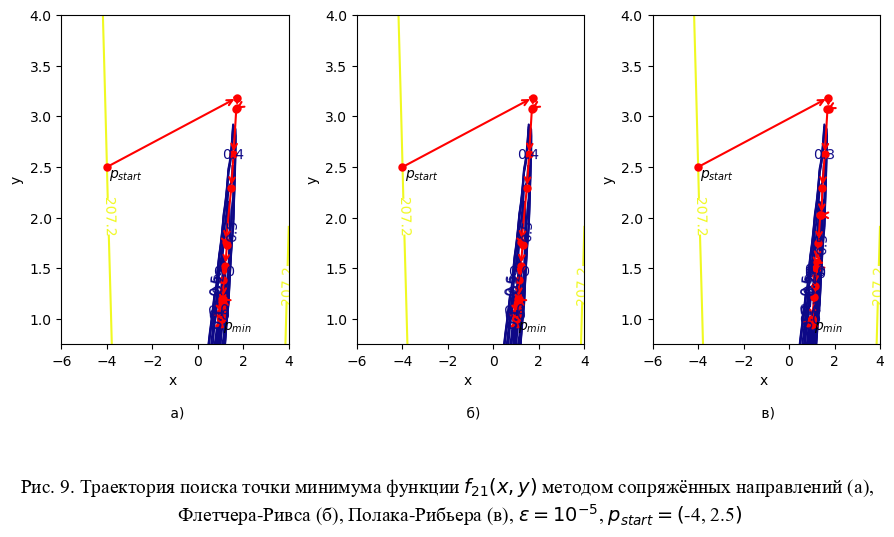

In [45]:
ExperimentPlot(np.vectorize(f21_pl), xmin=-6, xmax=4, 
               ymin=0.75, ymax=4, n1=its1[-1]-1, n2=its2[-1]-1, n3=its3[-1]-1,
               xs1=xs3_f21, ys1=ys3_f21,
               xs2=xs4_f21, ys2=ys4_f21, 
               xs3=xs5_f21, ys3=ys5_f21,
               ind=9, xstart=-4, ystart=2.5,
              xspacing=0.1, yspacing=0.1, fnum=21, eps=5)

In [46]:
xmin6_f21, ymin6_f21, fmin6_f21, xs6_f21, ys6_f21, its6_f21, fls6_f21, grs6_f21 = InfoConjugateMinSearch(f21, grad_f21, eps1, 
                                                                                                 np.array([2, -5]))
xmins3.append(xmin5_f21)
xmins1.append(xmin6_f21)
ymins1.append(ymin6_f21)
fmins1.append(fmin6_f21)
its1.append(its6_f21)
fls1.append(fls6_f21)
grs1.append(grs6_f21)

In [47]:
xmin7_f21, ymin7_f21, fmin7_f21, xs7_f21, ys7_f21, its7_f21, fls7_f21, grs7_f21 = InfoFletcherReevesMinSearch(f21, grad_f21, eps1, 
                                                                                                 np.array([2, -5]))
xmins2.append(xmin7_f21)
ymins2.append(ymin7_f21)
fmins2.append(fmin7_f21)
its2.append(its7_f21)
fls2.append(fls7_f21)
grs2.append(grs7_f21)

In [48]:
xmin8_f21, ymin8_f21, fmin8_f21, xs8_f21, ys8_f21, its8_f21, fls8_f21, grs8_f21 = InfoPolakRibiereMinSearch(f21, grad_f21, eps1, 
                                                                                                 np.array([2, -5]))
xmins3.append(xmin8_f21)
ymins3.append(ymin8_f21)
fmins3.append(fmin8_f21)
its3.append(its8_f21)
fls3.append(fls8_f21)
grs3.append(grs8_f21)

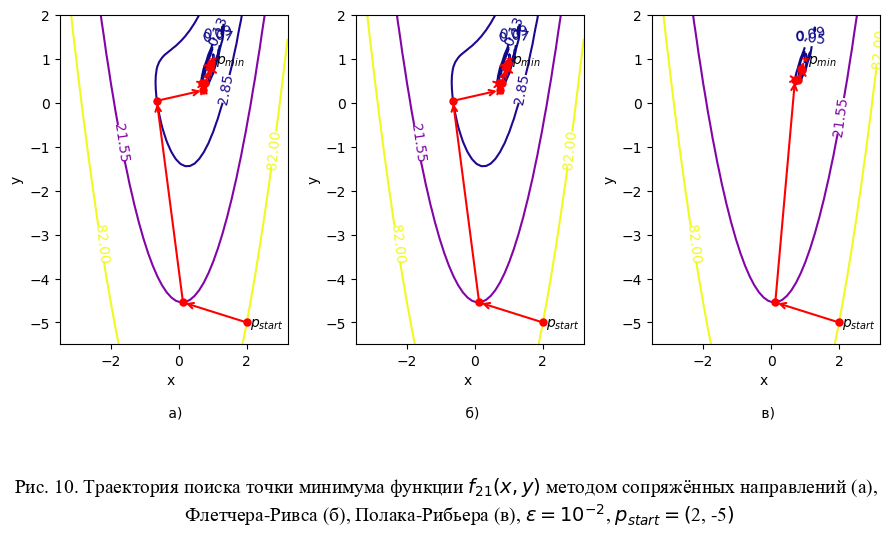

In [49]:
ExperimentPlot(np.vectorize(f21_pl), xmin=-3.5, xmax=3.2, 
               ymin=-5.5, ymax=2, n1=its1[-1]-1, n2=its2[-1]-1, n3=its3[-1]-1,
               xs1=xs6_f21, ys1=ys6_f21,
               xs2=xs7_f21, ys2=ys7_f21, 
               xs3=xs8_f21, ys3=ys8_f21,
               ind=10, xstart=2, ystart=-5,
              xspacing=0.1, yspacing=0.1, fnum=21, eps=2)

In [50]:
xmin9_f21, ymin9_f21, fmin9_f21, xs9_f21, ys9_f21, its9_f21, fls9_f21, grs9_f21 = InfoConjugateMinSearch(f21, grad_f21, eps2, 
                                                                                                 np.array([2, -5]))
xmins1.append(xmin9_f21)
ymins1.append(ymin9_f21)
fmins1.append(fmin9_f21)
its1.append(its9_f21)
fls1.append(fls9_f21)
grs1.append(grs9_f21)

In [51]:
xmin10_f21, ymin10_f21, fmin10_f21, xs10_f21, ys10_f21, its10_f21, fls10_f21, grs10_f21 = InfoFletcherReevesMinSearch(f21, grad_f21, eps2, 
                                                                                                 np.array([2, -5]))
xmins2.append(xmin10_f21)
ymins2.append(ymin10_f21)
fmins2.append(fmin10_f21)
its2.append(its10_f21)
fls2.append(fls10_f21)
grs2.append(grs10_f21)

In [52]:
xmin11_f21, ymin11_f21, fmin11_f21, xs11_f21, ys11_f21, its11_f21, fls11_f21, grs11_f21 = InfoPolakRibiereMinSearch(f21, grad_f21, eps2, 
                                                                                                 np.array([2, -5]))
xmins3.append(xmin11_f21)
ymins3.append(ymin11_f21)
fmins3.append(fmin11_f21)
its3.append(its11_f21)
fls3.append(fls11_f21)
grs3.append(grs11_f21)

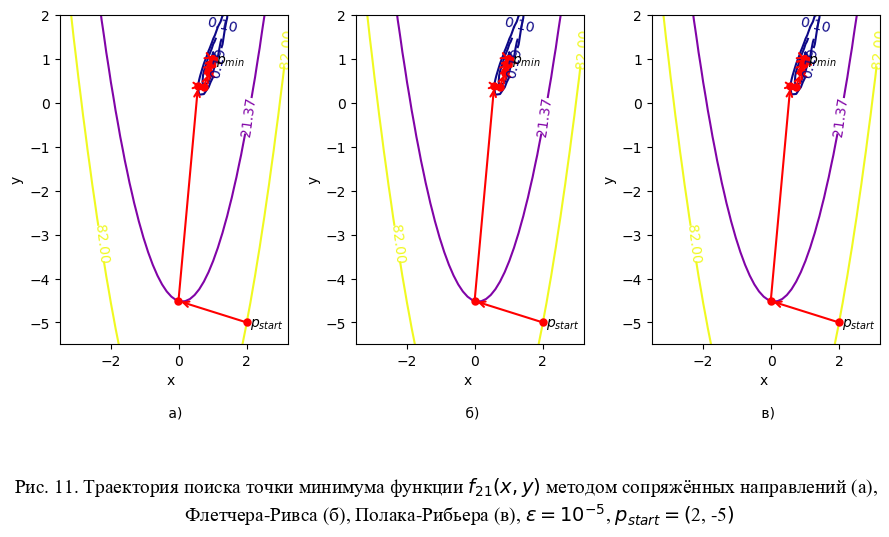

In [53]:
ExperimentPlot(np.vectorize(f21_pl), xmin=-3.5, xmax=3.2, 
               ymin=-5.5, ymax=2, n1=its1[-1]-1, n2=its2[-1]-1, n3=its3[-1]-1,
               xs1=xs9_f21, ys1=ys9_f21,
               xs2=xs10_f21, ys2=ys10_f21, 
               xs3=xs11_f21, ys3=ys11_f21,
               ind=11, xstart=2, ystart=-5,
              xspacing=0.1, yspacing=0.1, fnum=21, eps=5)

In [54]:
xmin0_f22, ymin0_f22, fmin0_f22, xs0_f22, ys0_f22, its0_f22, fls0_f22, grs0_f22 = InfoConjugateMinSearch(f22, grad_f22, eps1*1e-2, 
                                                                                                 np.array([-4, 2.5]))
xmins1.append(xmin0_f22)
ymins1.append(ymin0_f22)
fmins1.append(fmin0_f22)
its1.append(its0_f22)
fls1.append(fls0_f22)
grs1.append(grs0_f22)

In [55]:
xmin1_f22, ymin1_f22, fmin1_f22, xs1_f22, ys1_f22, its1_f22, fls1_f22, grs1_f22 = InfoFletcherReevesMinSearch(f22, grad_f22, eps1*1e-2, 
                                                                                                 np.array([-4, 2.5]))
xmins2.append(xmin1_f22)
ymins2.append(ymin1_f22)
fmins2.append(fmin1_f22)
its2.append(its1_f22)
fls2.append(fls1_f22)
grs2.append(grs1_f22)

In [56]:
xmin2_f22, ymin2_f22, fmin2_f22, xs2_f22, ys2_f22, its2_f22, fls2_f22, grs2_f22 = InfoPolakRibiereMinSearch(f22, grad_f22, eps1*1e-2, 
                                                                                                 np.array([-4, 2.5]))
xmins3.append(xmin2_f22)
ymins3.append(ymin2_f22)
fmins3.append(fmin2_f22)
its3.append(its2_f22)
fls3.append(fls2_f22)
grs3.append(grs2_f22)

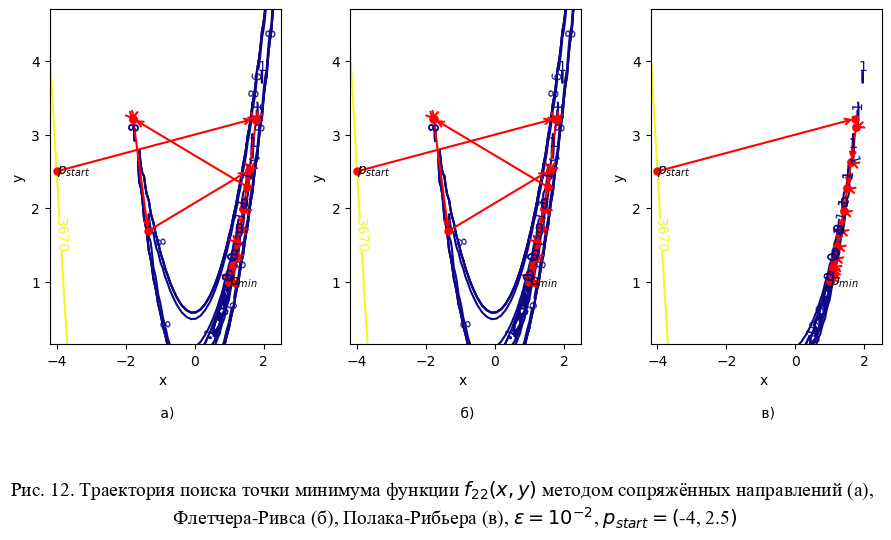

In [57]:
ExperimentPlot(np.vectorize(f22_pl), xmin=-4.2, xmax=2.5, 
               ymin=0.15, ymax=4.7, n1=its1[-1]-1, n2=its2[-1]-1, n3=its3[-1]-1,
               xs1=xs0_f22, ys1=ys0_f22,
               xs2=xs1_f22, ys2=ys1_f22,
               xs3=xs2_f22, ys3=ys2_f22,
               ind=12, xstart=-4, ystart=2.5,
              xspacing=0, yspacing=0.03, fnum=22)

In [58]:
xmin3_f22, ymin3_f22, fmin3_f22, xs3_f22, ys3_f22, its3_f22, fls3_f22, grs3_f22 = InfoConjugateMinSearch(f22, grad_f22, eps2*1e-2, 
                                                                                                 np.array([-4, 2.5]))
xmins1.append(xmin3_f22)
ymins1.append(ymin3_f22)
fmins1.append(fmin3_f22)
its1.append(its3_f22)
fls1.append(fls3_f22)
grs1.append(grs3_f22)

In [59]:
xmin4_f22, ymin4_f22, fmin4_f22, xs4_f22, ys4_f22, its4_f22, fls4_f22, grs4_f22 = InfoFletcherReevesMinSearch(f22, grad_f22, eps2*1e-2, 
                                                                                                 np.array([-4, 2.5]))
xmins2.append(xmin4_f22)
ymins2.append(ymin4_f22)
fmins2.append(fmin4_f22)
its2.append(its4_f22)
fls2.append(fls4_f22)
grs2.append(grs4_f22)

In [60]:
xmin5_f22, ymin5_f22, fmin5_f22, xs5_f22, ys5_f22, its5_f22, fls5_f22, grs5_f22 = InfoPolakRibiereMinSearch(f22, grad_f22, eps2*1e-2, 
                                                                                                 np.array([-4, 2.5]))
xmins3.append(xmin5_f22)
ymins3.append(ymin5_f22)
fmins3.append(fmin5_f22)
its3.append(its5_f22)
fls3.append(fls5_f22)
grs3.append(grs5_f22)

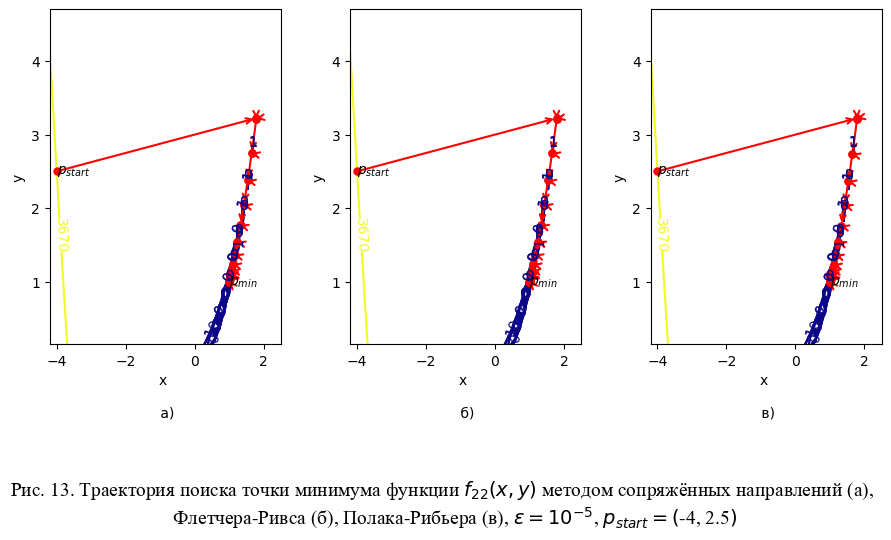

In [61]:
ExperimentPlot(np.vectorize(f22_pl), xmin=-4.2, xmax=2.5,  
                ymin=0.15, ymax=4.7, n1=its1[-1]-1, n2=its2[-1]-1, n3=its3[-1]-1,
               xs1=xs3_f22, ys1=ys3_f22,
               xs2=xs4_f22, ys2=ys4_f22,
               xs3=xs5_f22, ys3=ys5_f22,
               ind=13, xstart=-4, ystart=2.5,
              xspacing=0, yspacing=0.03, fnum=22, eps=5)

In [62]:
import pandas as pd
from IPython.display import HTML

#      # точность / нач точка / кол-во итераций / кол-во вычисленных значений / точка минимума / мин знач / 
# f1
# f21
# # f22
# xmins2.append(xmin1_f22)
# ymins2.append(ymin1_f22)
# fmins2.append(fmin1_f22)
# its2.append(its1_f22)
# fls2.append(fls1_f22)
# grs2.append(grs1_f22)

funcs = ['f1(x, y)','f1(x, y)','f1(x, y)','f1(x, y)',
         'f21(x, y)', 'f21(x, y)','f21(x, y)', 'f21(x, y)',
         'f22(x, y)','f22(x, y)']
prec = [format(el, '0.1e') for el in [eps1, eps2]]
df1 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(2, -5)', '(2, -5)', 
                                       '(-4, 2.5)', '(-4, 2.5)', '(2, -5)', '(2, -5)',
                                       '(-4, 2.5)', '(-4, 2.5)'],
                    "Кол-во итераций": [elem for elem in its1], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in fls1],
                    "Кол-во вычисленных градиентов": [elem for elem in grs1],
                    "Точка минимума": [f'({xmins1[0]: 0.2f}, {ymins1[0]: 0.2f})',
                                     f'({xmins1[1]: 0.5f}, {ymins1[1]: 0.5f})',
                                     f'({xmins1[2]: 0.2f}, {ymins1[2]: 0.2f})',
                                     f'({xmins1[3]: 0.5f}, {ymins1[3]: 0.5f})',
                                     f'({xmins1[4]: 0.2f}, {ymins1[4]: 0.2f})',
                                     f'({xmins1[5]: 0.5f}, {ymins1[5]: 0.5f})',
                                     f'({xmins1[6]: 0.2f}, {ymins1[6]: 0.2f})',
                                     f'({xmins1[7]: 0.5f}, {ymins1[7]: 0.5f})',
                                     f'({xmins1[8]: 0.2f}, {ymins1[8]: 0.2f})',
                                     f'({xmins1[9]: 0.5f}, {ymins1[9]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins1[0]: 0.2f}',
                                                f'{fmins1[1]: 0.5f}',
                                                f'{fmins1[2]: 0.2f}',
                                                f'{fmins1[3]: 0.5f}',
                                                f'{fmins1[4]: 0.2f}',
                                                f'{fmins1[5]: 0.5f}',
                                                f'{fmins1[6]: 0.2f}',
                                                f'{fmins1[7]: 0.5f}',
                                                f'{fmins1[8]: 0.2f}',
                                                f'{fmins1[9]: 0.5f}']
                   })
s = df1.style.hide(axis="index").set_caption("Табл. 1. Результаты поиска минимумов функций методом сопряжённых градиентов")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s.set_table_styles([cell_hover, headers])
s.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",2,44,3,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",2,72,3,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(2, -5)",2,44,3,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(2, -5)",2,72,3,"( 0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",12,144,13,"( 1.00, 1.01)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",23,598,24,"( 0.99999, 0.99998)",0.00000
"f21(x, y)",1.0e-02,"(2, -5)",10,120,11,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(2, -5)",16,416,17,"( 1.00000, 1.00000)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",36,792,37,"( 1.00, 1.00)",0.00
"f22(x, y)",1.0e-05,"(-4, 2.5)",32,1152,33,"( 1.00000, 1.00000)",0.00000


In [63]:
df2 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка":  ['(-4, 2.5)', '(-4, 2.5)', '(2, -5)', '(2, -5)', 
                                       '(-4, 2.5)', '(-4, 2.5)', '(2, -5)', '(2, -5)',
                                       '(-4, 2.5)', '(-4, 2.5)'],
                    "Кол-во итераций": [elem for elem in its2], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in fls2],
                    "Кол-во вычисленных градиентов": [elem for elem in grs2],
                    "Точка минимума": [f'({xmins1[0]: 0.2f}, {ymins2[0]: 0.2f})',
                                     f'({xmins2[1]: 0.5f}, {ymins2[1]: 0.5f})',
                                     f'({xmins2[2]: 0.2f}, {ymins2[2]: 0.2f})',
                                     f'({xmins2[3]: 0.5f}, {ymins2[3]: 0.5f})',
                                     f'({xmins2[4]: 0.2f}, {ymins2[4]: 0.2f})',
                                     f'({xmins2[5]: 0.5f}, {ymins2[5]: 0.5f})',
                                     f'({xmins2[6]: 0.2f}, {ymins2[6]: 0.2f})',
                                     f'({xmins2[7]: 0.5f}, {ymins2[7]: 0.5f})',
                                     f'({xmins2[8]: 0.2f}, {ymins2[8]: 0.2f})',
                                     f'({xmins2[9]: 0.5f}, {ymins2[9]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins2[0]: 0.2f}',
                                                f'{fmins2[1]: 0.5f}',
                                                f'{fmins2[2]: 0.2f}',
                                                f'{fmins2[3]: 0.5f}',
                                                f'{fmins2[4]: 0.2f}',
                                                f'{fmins2[5]: 0.5f}',
                                                f'{fmins2[6]: 0.2f}',
                                                f'{fmins2[7]: 0.5f}',
                                                f'{fmins2[8]: 0.2f}',
                                                f'{fmins2[9]: 0.5f}']
                   })
s2 = df2.style.hide(axis="index").set_caption("Табл. 2. Результаты поиска минимумов функций методом Флетчера-Ривса")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s2.set_table_styles([cell_hover, headers])
s2.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s2.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)
s2

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",2,44,3,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",2,72,3,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(2, -5)",2,44,3,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(2, -5)",2,72,3,"( 0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",12,144,13,"( 1.00, 1.01)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",23,598,24,"( 0.99999, 0.99998)",0.00000
"f21(x, y)",1.0e-02,"(2, -5)",10,120,11,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(2, -5)",16,416,17,"( 1.00000, 1.00000)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",36,792,37,"( 1.00, 1.00)",0.00
"f22(x, y)",1.0e-05,"(-4, 2.5)",32,1152,33,"( 1.00000, 1.00000)",0.00000


In [64]:
df3 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка":  ['(-4, 2.5)', '(-4, 2.5)', '(2, -5)', '(2, -5)', 
                                       '(-4, 2.5)', '(-4, 2.5)', '(2, -5)', '(2, -5)',
                                       '(-4, 2.5)', '(-4, 2.5)'],
                    "Кол-во итераций": [elem for elem in its3], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in fls3],
                    "Кол-во вычисленных градиентов": [elem for elem in grs3],
                    "Точка минимума": [f'({xmins3[0]: 0.2f}, {ymins3[0]: 0.2f})',
                                     f'({xmins3[1]: 0.5f}, {ymins3[1]: 0.5f})',
                                     f'({xmins3[2]: 0.2f}, {ymins3[2]: 0.2f})',
                                     f'({xmins3[3]: 0.5f}, {ymins3[3]: 0.5f})',
                                     f'({xmins3[4]: 0.2f}, {ymins3[4]: 0.2f})',
                                     f'({xmins3[5]: 0.5f}, {ymins3[5]: 0.5f})',
                                     f'({xmins3[6]: 0.2f}, {ymins3[6]: 0.2f})',
                                     f'({xmins3[7]: 0.5f}, {ymins3[7]: 0.5f})',
                                     f'({xmins3[8]: 0.2f}, {ymins3[8]: 0.2f})',
                                     f'({xmins3[9]: 0.5f}, {ymins3[9]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins3[0]: 0.2f}',
                                                f'{fmins3[1]: 0.5f}',
                                                f'{fmins3[2]: 0.2f}',
                                                f'{fmins3[3]: 0.5f}',
                                                f'{fmins3[4]: 0.2f}',
                                                f'{fmins3[5]: 0.5f}',
                                                f'{fmins3[6]: 0.2f}',
                                                f'{fmins3[7]: 0.5f}',
                                                f'{fmins3[8]: 0.2f}',
                                                f'{fmins3[9]: 0.5f}']
                   })
s3 = df3.style.hide(axis="index").set_caption("Табл. 3. Результаты поиска минимумов функций методом Полака-Рибьера")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s3.set_table_styles([cell_hover, headers])
s3.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s3.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)
s3

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",2,44,3,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",2,72,3,"( 0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(2, -5)",2,44,3,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(2, -5)",2,72,3,"( 0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",15,180,16,"( 1.01, 1.02)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",22,572,23,"( 1.00000, 1.00000)",0.00000
"f21(x, y)",1.0e-02,"(2, -5)",7,84,8,"( 1.00, 0.99)",0.00
"f21(x, y)",1.0e-05,"(2, -5)",16,416,17,"( 0.99622, 1.00000)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",27,594,28,"( 1.00, 1.00)",0.00
"f22(x, y)",1.0e-05,"(-4, 2.5)",36,1296,37,"( 1.00002, 1.00000)",0.00000


# Выводы

На основании результатов экспериментов можно сделать следующие выводы.

1)Для квадратичной функции разницы в выборе метода нету, поиск минимума
осуществляется не более чем за $n$ итераций, где $n$ – размерность пространства. Количество вычисленных градиентов – $n+1$.

2)Для неквадратичных функций, например функции Розенброка, все методы устроены одинаково.Отличие заключается в вычислении коэффициента γ. 


In [65]:
df4 = pd.DataFrame({"Метод":["Сопряжённых градиентов","Сопряжённых градиентов","Сопряжённых градиентов","Сопряжённых градиентов",
                            "Флетчера-Ривса","Флетчера-Ривса","Флетчера-Ривса","Флетчера-Ривса",
                            "Полака-Ривьера","Полака-Ривьера","Полака-Ривьера","Полака-Ривьера",],
                    "Функция": [funcs[0] for i in range(12)],
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1],prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', 
                                        '(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)',
                                       '(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)'],
                    "Кол-во итераций": [its1[0], its1[1], its1[2], its1[3],
                                       its2[0], its2[1], its2[2], its2[3],
                                       its3[0], its3[1], its3[2], its3[3],], 
                    "Кол-во вычисленных значений целевой функции": [fls1[0], fls1[1], fls1[2], fls1[3],
                                       fls2[0], fls2[1], fls2[2], fls2[3],
                                       fls3[0], fls3[1], fls3[2], fls3[3],],
                    "Кол-во вычисленных градиентов": [grs1[0], grs1[1], grs1[2], grs1[3],
                                       grs2[0], grs2[1], grs2[2], grs2[3],
                                       grs3[0], grs3[1], grs3[2], grs3[3],],
                    "Точка минимума": [f'({xmins1[0]: 0.2f}, {ymins1[0]: 0.2f})',
                                     f'({xmins1[1]: 0.5f}, {ymins1[1]: 0.5f})',
                                     f'({xmins1[2]: 0.2f}, {ymins1[2]: 0.2f})',
                                     f'({xmins1[3]: 0.5f}, {ymins1[3]: 0.5f})',
                                     f'({xmins2[0]: 0.2f}, {ymins2[0]: 0.2f})',
                                     f'({xmins2[1]: 0.5f}, {ymins2[1]: 0.5f})',
                                     f'({xmins2[2]: 0.2f}, {ymins2[2]: 0.2f})',
                                     f'({xmins2[3]: 0.5f}, {ymins2[3]: 0.5f})',
                                      f'({xmins3[0]: 0.2f}, {ymins3[0]: 0.2f})',
                                     f'({xmins3[1]: 0.5f}, {ymins3[1]: 0.5f})',
                                     f'({xmins3[2]: 0.2f}, {ymins3[2]: 0.2f})',
                                     f'({xmins3[3]: 0.5f}, {ymins3[3]: 0.5f})',],
                    "Минимальное значение функции": [f'{fmins1[0]: 0.2f}',
                                                f'{fmins1[1]: 0.5f}',
                                                f'{fmins1[2]: 0.2f}',
                                                f'{fmins1[3]: 0.5f}',
                                                f'{fmins2[0]: 0.2f}',
                                                f'{fmins2[1]: 0.5f}',
                                                f'{fmins2[2]: 0.2f}',
                                                f'{fmins2[3]: 0.5f}',
                                                f'{fmins3[0]: 0.2f}',
                                                f'{fmins3[1]: 0.5f}',
                                                f'{fmins3[2]: 0.2f}',
                                                f'{fmins3[3]: 0.5f}',]
                   })
s4 = df4.style.hide(axis="index").set_caption("Табл. 4. Результаты поиска минимумов квадратичной функции различными методами")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s4.set_table_styles([cell_hover, headers])
s4.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s4.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)
s4

Метод,Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
Сопряжённых градиентов,"f1(x, y)",1.0e-02,"(-4, 2.5)",2,44,3,"( 0.00, -2.24)",41.00
Сопряжённых градиентов,"f1(x, y)",1.0e-05,"(-4, 2.5)",2,72,3,"(-0.00000, -2.23607)",41.00000
Сопряжённых градиентов,"f1(x, y)",1.0e-02,"(3, -1)",2,44,3,"( 0.00, -2.24)",41.00
Сопряжённых градиентов,"f1(x, y)",1.0e-05,"(3, -1)",2,72,3,"( 0.00000, -2.23607)",41.00000
Флетчера-Ривса,"f1(x, y)",1.0e-02,"(-4, 2.5)",2,44,3,"( 0.00, -2.24)",41.00
Флетчера-Ривса,"f1(x, y)",1.0e-05,"(-4, 2.5)",2,72,3,"(-0.00000, -2.23607)",41.00000
Флетчера-Ривса,"f1(x, y)",1.0e-02,"(3, -1)",2,44,3,"( 0.00, -2.24)",41.00
Флетчера-Ривса,"f1(x, y)",1.0e-05,"(3, -1)",2,72,3,"( 0.00000, -2.23607)",41.00000
Полака-Ривьера,"f1(x, y)",1.0e-02,"(-4, 2.5)",2,44,3,"( 0.00, -2.24)",41.00
Полака-Ривьера,"f1(x, y)",1.0e-05,"(-4, 2.5)",2,72,3,"( 0.00000, -2.23607)",41.00000


# Выводы

Для квадратичной функции вариант метода сопряжённых градиентов позволяет найти точку минимума, потребовав меньшее число вычислений целевой функции

In [66]:
a = np.array([-2,2])
b = np.array([1,-1])
np.matmul(a,b)
[c,d] = a

In [67]:
c

-2

In [68]:
d

2

### 